<a href="https://colab.research.google.com/github/AdRavi89/TugasKuliahUSM/blob/main/Praktikum_6_AI_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLUSTERING DATA WITH K-MEANS ALGORITHM**

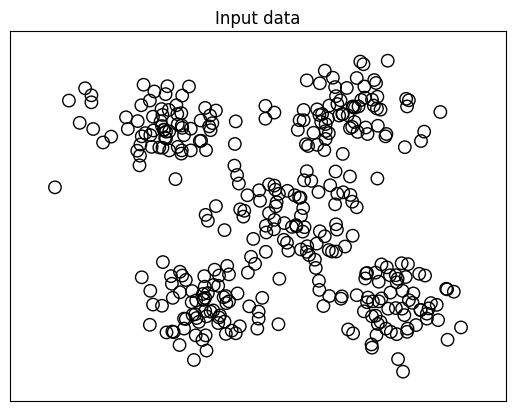

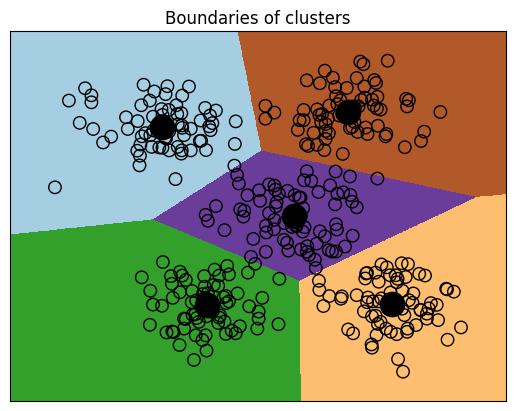

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

X = np.loadtxt('data_clustering.txt', delimiter=',')
num_clusters = 5

plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none',
        edgecolors='black', s=80)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

kmeans.fit(X)

step_size = 0.01

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size),
        np.arange(y_min, y_max, step_size))

output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',
            extent=(x_vals.min(), x_vals.max(),
          y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower')

plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none',
        edgecolors='black', s=80)

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
        marker='o', s=210, linewidths=4, color='black',
        zorder=12, facecolors='black')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
